# 1. Importacion y configuracion
Lo primero es trear las herramientas que usaremos, las cuales seran pandas, numpy, matplotlib y seaborn.

In [1]:
#1 Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Configuracion estetica de las grafiicas
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerias Importadas Correctamente")

Librerias Importadas Correctamente


# 2. Cargar y Auditoria 
Vamos a cargar el archivo Mall_Customers.cvs y hora haremos unas correciones.

In [3]:
#2 Cargar y Limpieza inicial
df = pd.read_csv('OneDrive/Desktop/SENA/K-Means/Mall_Customers.csv')

In [4]:
# Renombrar la columna Gender que se encontraba mal escrita
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [5]:
# Vizualizar las priemras 5 filas para confirmar
print("---Vista Previa del Dataset---")
display(df.head())

---Vista Previa del Dataset---


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Auditoria de Tipos de Datos y NUlos
print("\n---Informacion Tecnica del Dataset---")
df.info()


---Informacion Tecnica del Dataset---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Verificacion explicita de nulos
print("\n---Conteo de Valores Nulos---")
print(df.isnull().sum())


---Conteo de Valores Nulos---
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


No encontramos ningun dato nulo, lo cual es perfecto por que significa que los datos estan integros.

# 3. Estadistica Descriptiva
Ahora vamos a trater de entender los numeros.
Cual es el ingreso promedio?
Cual es la edad minima y maxima?

In [8]:
#3 Estadisticas Descriptivas
# Seleccionamos solo las variables numericas relevantes
stats = df.describe()


In [9]:
#Trasponemos (.T) para leers los stats mas facil
display(stats.T)

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


#### Obtenemos datos como:
1. En Age (edad) vemos que la media deberia ser aproximadamente 38
2. En Income (ingresos) descubrimos que el min es de 15k y el max es de 137k, al haber una diferencia tan enorme debemos Estandarizar.
3. Spending Score vemos una media de 50.2 lo cual indica que los datos estan bien balanceados

# 4. Visualizacion: Distribuciones
Vamos a ver la "Forma" de los datos generando graficos de distribucion.

In [10]:
#4 Distribuciones Univariadas
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frecuencia')

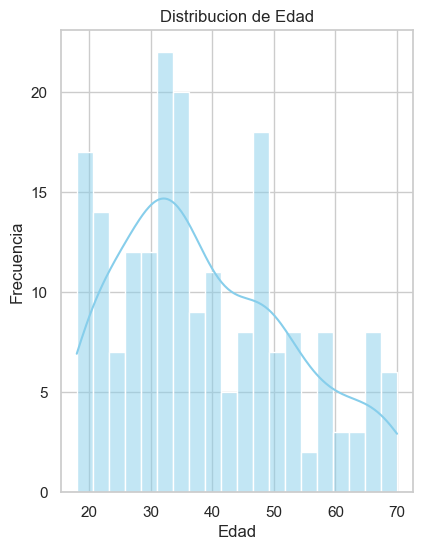

In [11]:
#Histograma de Edad
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, color='skyblue', bins=20)
plt.title('Distribucion de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Text(0.5, 0, 'Ingreso (K$)')

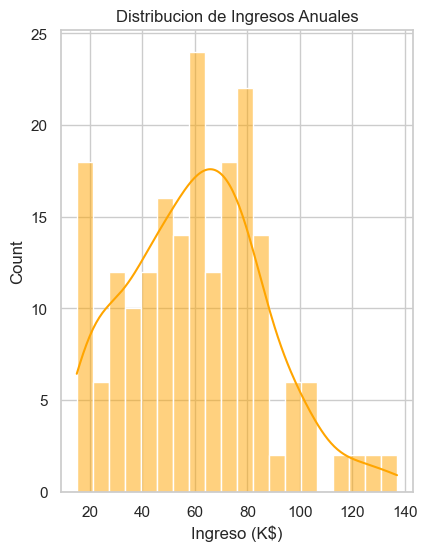

In [12]:
#Histograma de Ingresos
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange', bins=20)
plt.title('Distribucion de Ingresos Anuales')
plt.xlabel('Ingreso (K$)')

Text(0.5, 0, 'Puntaje (1-100)')

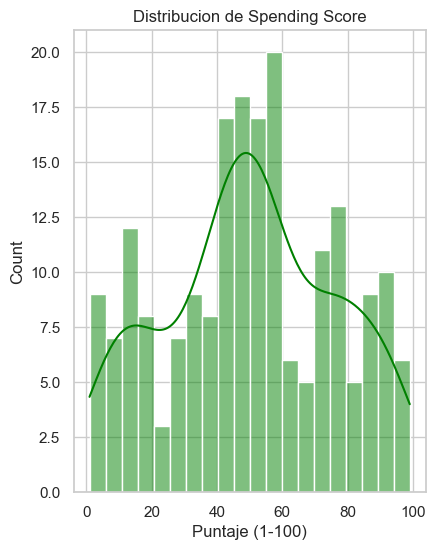

In [13]:
#Histograma de puntaje
plt.subplot(1,2,1)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green', bins=20)
plt.title('Distribucion de Spending Score')
plt.xlabel('Puntaje (1-100)')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

# 5. Visualizacion: Correlaciones (El mapa de calor)
Necesitamos justificar el por que usar K-Means. Si hubiera una linea recta perfecta entre Ingresos y Gastos no necesitariamos IA.

In [25]:
#5 Matriz de correlacion

#Eliminamos CustomerID (no siver, es un identificador) y Gender (es texto)
df_corr = df.drop(['CustomerID', 'Gender'], axis=1)

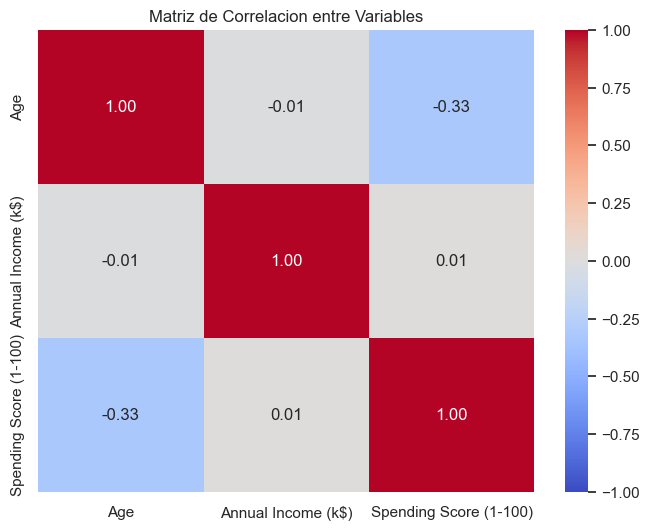

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlacion entre Variables')
plt.show()

#### Conclusion
La matriz de correlacion muestra un valor cercano a 0 entre Ingresos y Puntaje de Gastos. Esto indica que no existe una relacion lineal directa (ganar mas no te hace gastar mas). Por lo tanto, es necesario utilizar algoritmos de agrupamientos (Clustering) para detectar patrones no lineales complejos.